In [1]:
##LIbraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.ExcelFile('data.xlsx')
df.sheet_names

['Descriptions', 'Pre-Crisis', 'Post-Crisis']

In [3]:
pre = df.parse(sheet_name="Pre-Crisis")
post = df.parse(sheet_name="Post-Crisis")

In [4]:
##dividing dataset into training, validation and testing set
# splitting the dataframe into 2 parts
# on basis of 'Weight' column values
pre_train = pre[pre['Partition'] == 't']
pre_valid = pre[pre['Partition'] == 'v']
pre_test = pre[pre['Partition'] == 's']
# printing df1
pre_train.head()

,LandValue,BuildingValue,Acres,AboveSpace,Basement,Deck,Baths,Toilets,Fireplaces,Beds,Rooms,AC,Age,Car,PoorCondition,GoodCondition,Price$,Partition
0,15200,52400,0.258,695,0,0,1,0,0,2,2,1,50.786301,0,0,0,74818.400491,t
1,16100,123300,0.281,1054,450,180,2,0,1,3,2,1,30.791781,0,0,1,137461.628199,t
2,17900,63900,0.495,891,0,180,1,0,0,2,3,0,53.824658,576,0,0,56850.201948,t
3,25400,132400,0.264,1080,450,64,2,0,1,3,2,1,30.884932,330,0,1,137461.628199,t
4,23000,99800,0.178,1020,500,0,2,0,1,3,2,1,30.726027,0,0,1,131008.181577,t


In [5]:
pre_train.tail()

,LandValue,BuildingValue,Acres,AboveSpace,Basement,Deck,Baths,Toilets,Fireplaces,Beds,Rooms,AC,Age,Car,PoorCondition,GoodCondition,Price$,Partition
1181,19300,129400,0.157,2157,0,216,2,0,1,3,6,0,97.471233,0,0,1,141894.944036,t
1182,39600,91300,0.542,976,450,108,2,0,0,2,3,1,62.052055,0,0,1,144350.000000,t
1183,25800,105300,0.169,1072,0,0,1,1,0,3,3,1,58.830137,0,0,1,122733.596607,t
1184,16100,74300,0.293,768,0,0,1,0,0,2,2,1,54.654795,352,0,0,85796.380871,t
1185,25700,90300,0.300,1605,300,0,2,0,1,4,3,1,79.890411,0,0,0,137461.628199,t


In [6]:
pre_train.shape

(1186, 18)

In [7]:
pre_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 0 to 1185
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LandValue      1186 non-null   int64  
 1   BuildingValue  1186 non-null   int64  
 2   Acres          1186 non-null   float64
 3   AboveSpace     1186 non-null   int64  
 4   Basement       1186 non-null   int64  
 5   Deck           1186 non-null   int64  
 6   Baths          1186 non-null   int64  
 7   Toilets        1186 non-null   int64  
 8   Fireplaces     1186 non-null   int64  
 9   Beds           1186 non-null   int64  
 10  Rooms          1186 non-null   int64  
 11  AC             1186 non-null   int64  
 12  Age            1186 non-null   float64
 13  Car            1186 non-null   int64  
 14  PoorCondition  1186 non-null   int64  
 15  GoodCondition  1186 non-null   int64  
 16  Price$         1186 non-null   float64
 17  Partition      1186 non-null   object 
dtypes: float

In [8]:
pre_train.isnull().sum()

LandValue        0
BuildingValue    0
Acres            0
AboveSpace       0
Basement         0
Deck             0
Baths            0
Toilets          0
Fireplaces       0
Beds             0
Rooms            0
AC               0
Age              0
Car              0
PoorCondition    0
GoodCondition    0
Price$           0
Partition        0
dtype: int64

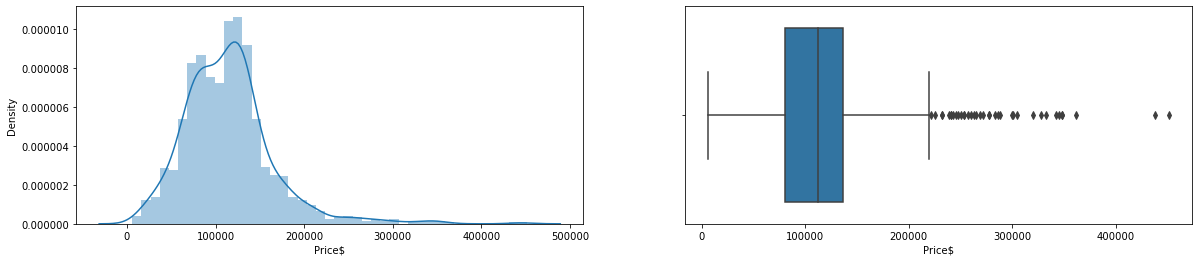

In [9]:
#Univariate analysis price

f1 = plt.figure(figsize=(20,4))

f1.add_subplot(1,2,1)
sns.distplot(pre_train['Price$'])

f1.add_subplot(1,2,2)
sns.boxplot(pre_train['Price$'])

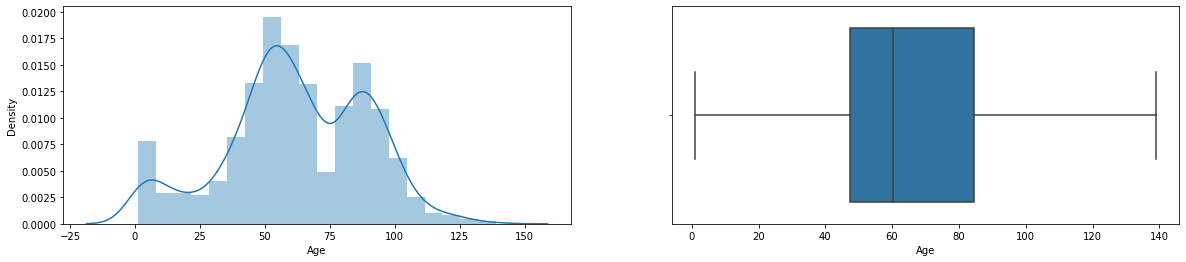

In [10]:
#Univariate analysis price

f3 = plt.figure(figsize=(20,4))

f3.add_subplot(1,2,1)
sns.distplot(pre_train['Age'])

f3.add_subplot(1,2,2)
sns.boxplot(pre_train['Age'])

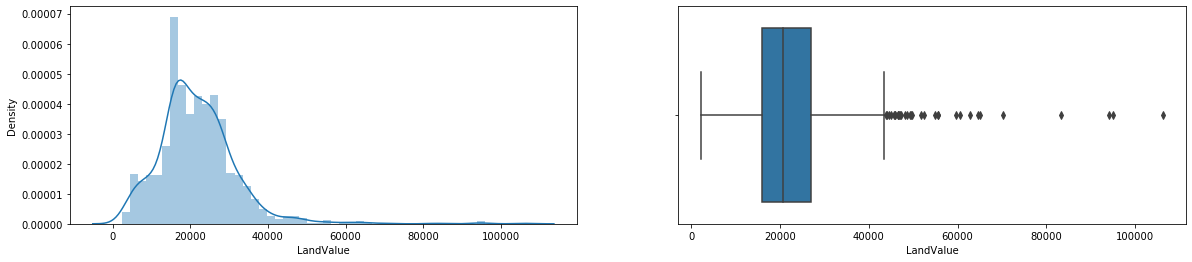

In [11]:
#Univariate analysis Land Value.

f5 = plt.figure(figsize=(20,4))

f5.add_subplot(1,2,1)
sns.distplot(pre_train['LandValue'])

f5.add_subplot(1,2,2)
sns.boxplot(pre_train['LandValue'])

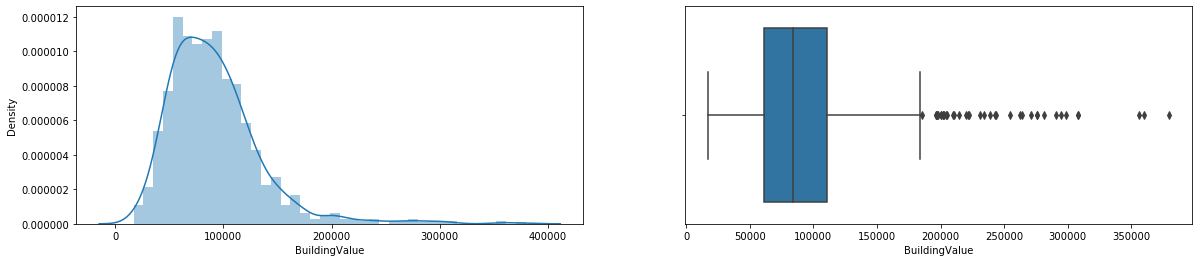

In [12]:
#Univariate analysis Building Value.

f6 = plt.figure(figsize=(20,4))

f6.add_subplot(1,2,1)
sns.distplot(pre_train['BuildingValue'])

f6.add_subplot(1,2,2)
sns.boxplot(pre_train['BuildingValue'])

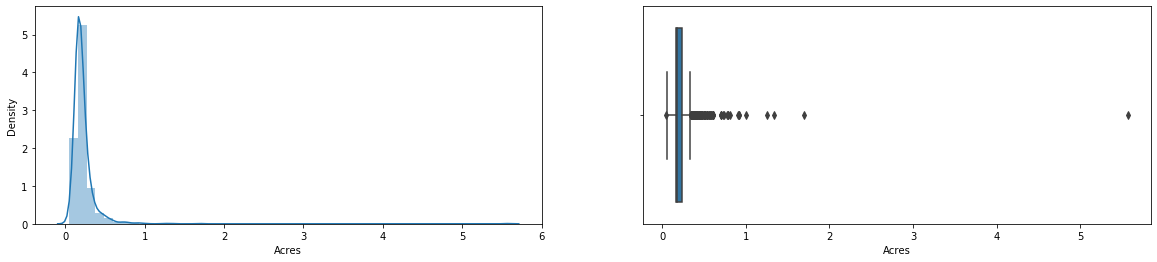

In [13]:
#Univariate analysis ACres.

f5 = plt.figure(figsize=(20,4))

f5.add_subplot(1,2,1)
sns.distplot(pre_train['Acres'])

f5.add_subplot(1,2,2)
sns.boxplot(pre_train['Acres'])

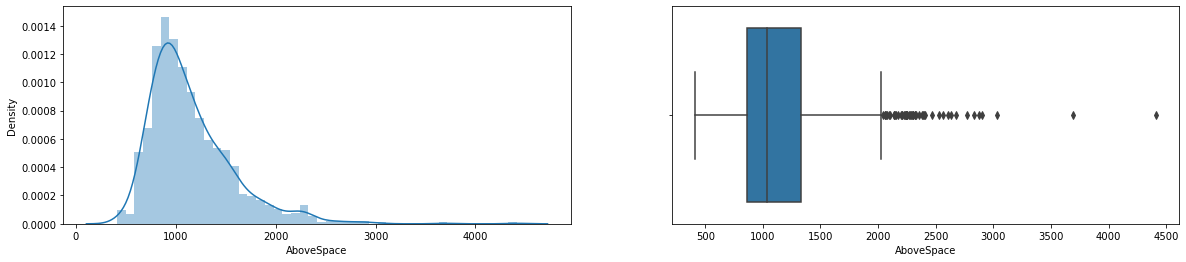

In [14]:
#Univariate analysis Above Space.

f5 = plt.figure(figsize=(20,4))

f5.add_subplot(1,2,1)
sns.distplot(pre_train['AboveSpace'])

f5.add_subplot(1,2,2)
sns.boxplot(pre_train['AboveSpace'])

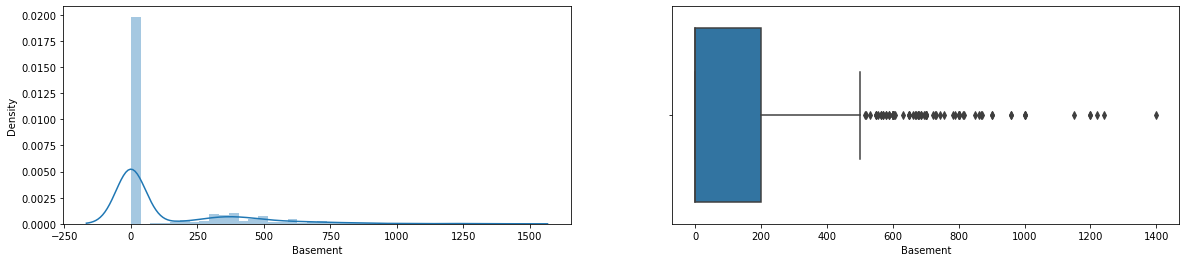

In [15]:
#Univariate analysis Basement.

f5 = plt.figure(figsize=(20,4))

f5.add_subplot(1,2,1)
sns.distplot(pre_train['Basement'])

f5.add_subplot(1,2,2)
sns.boxplot(pre_train['Basement'])

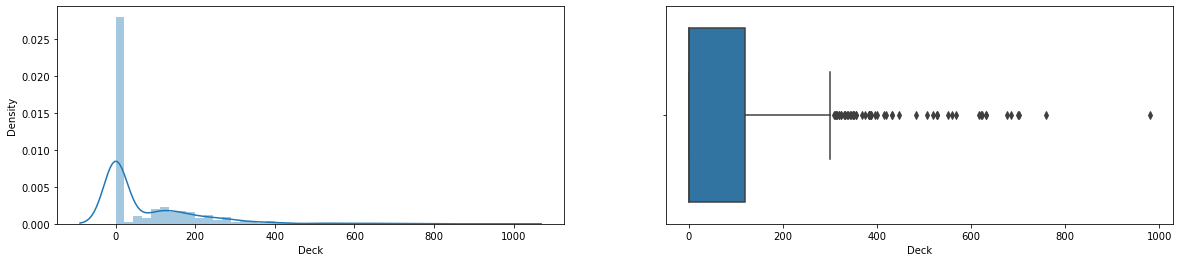

In [16]:
#Univariate analysis Deck.

f5 = plt.figure(figsize=(20,4))

f5.add_subplot(1,2,1)
sns.distplot(pre_train['Deck'])

f5.add_subplot(1,2,2)
sns.boxplot(pre_train['Deck'])

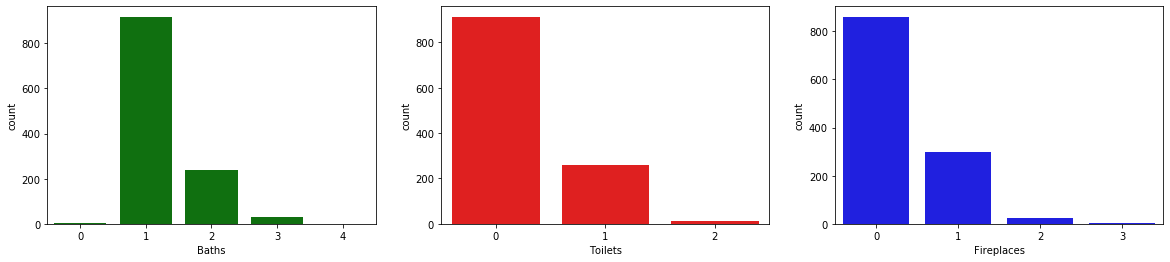

In [17]:
f = plt.figure(figsize=(20,4))

f.add_subplot(1,3,1)
sns.countplot(pre_train['Baths'], color='green')

f.add_subplot(1,3,2)
sns.countplot(pre_train['Toilets'], color='red')

f.add_subplot(1,3,3)
sns.countplot(pre_train['Fireplaces'], color='blue')

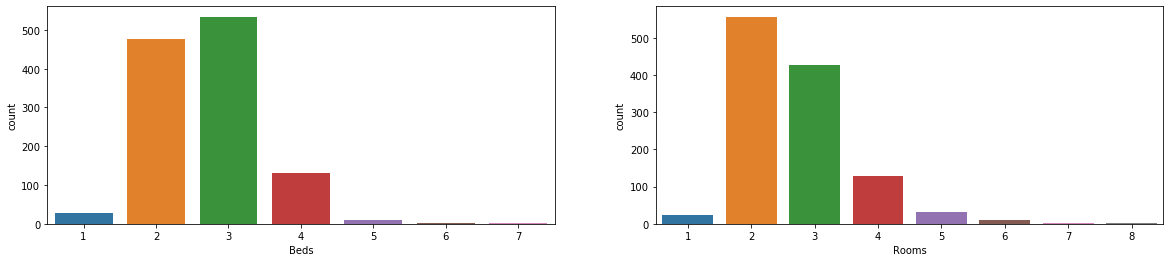

In [18]:
#Univariate analysis Beds and Rooms.

f5 = plt.figure(figsize=(20,4))

f5.add_subplot(1,2,1)
sns.countplot(pre_train['Beds'])

f5.add_subplot(1,2,2)
sns.countplot(pre_train['Rooms'])

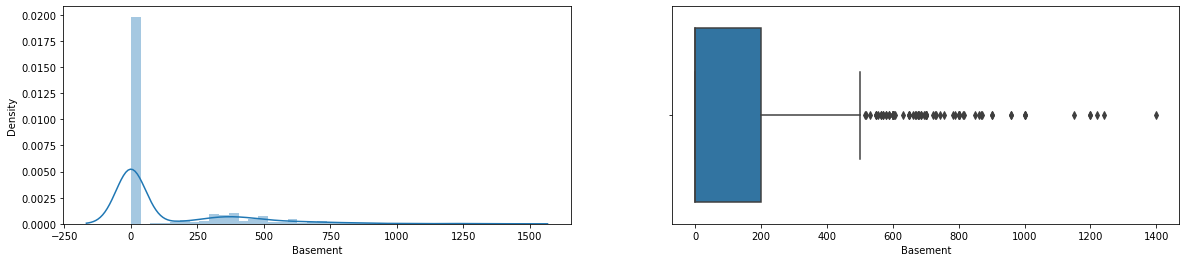

In [19]:
#Univariate analysis AbOVE SPACE Value.

f6 = plt.figure(figsize=(20,4))

f6.add_subplot(1,2,1)
sns.distplot(pre_train['Basement'])

f6.add_subplot(1,2,2)
sns.boxplot(pre_train['Basement'])

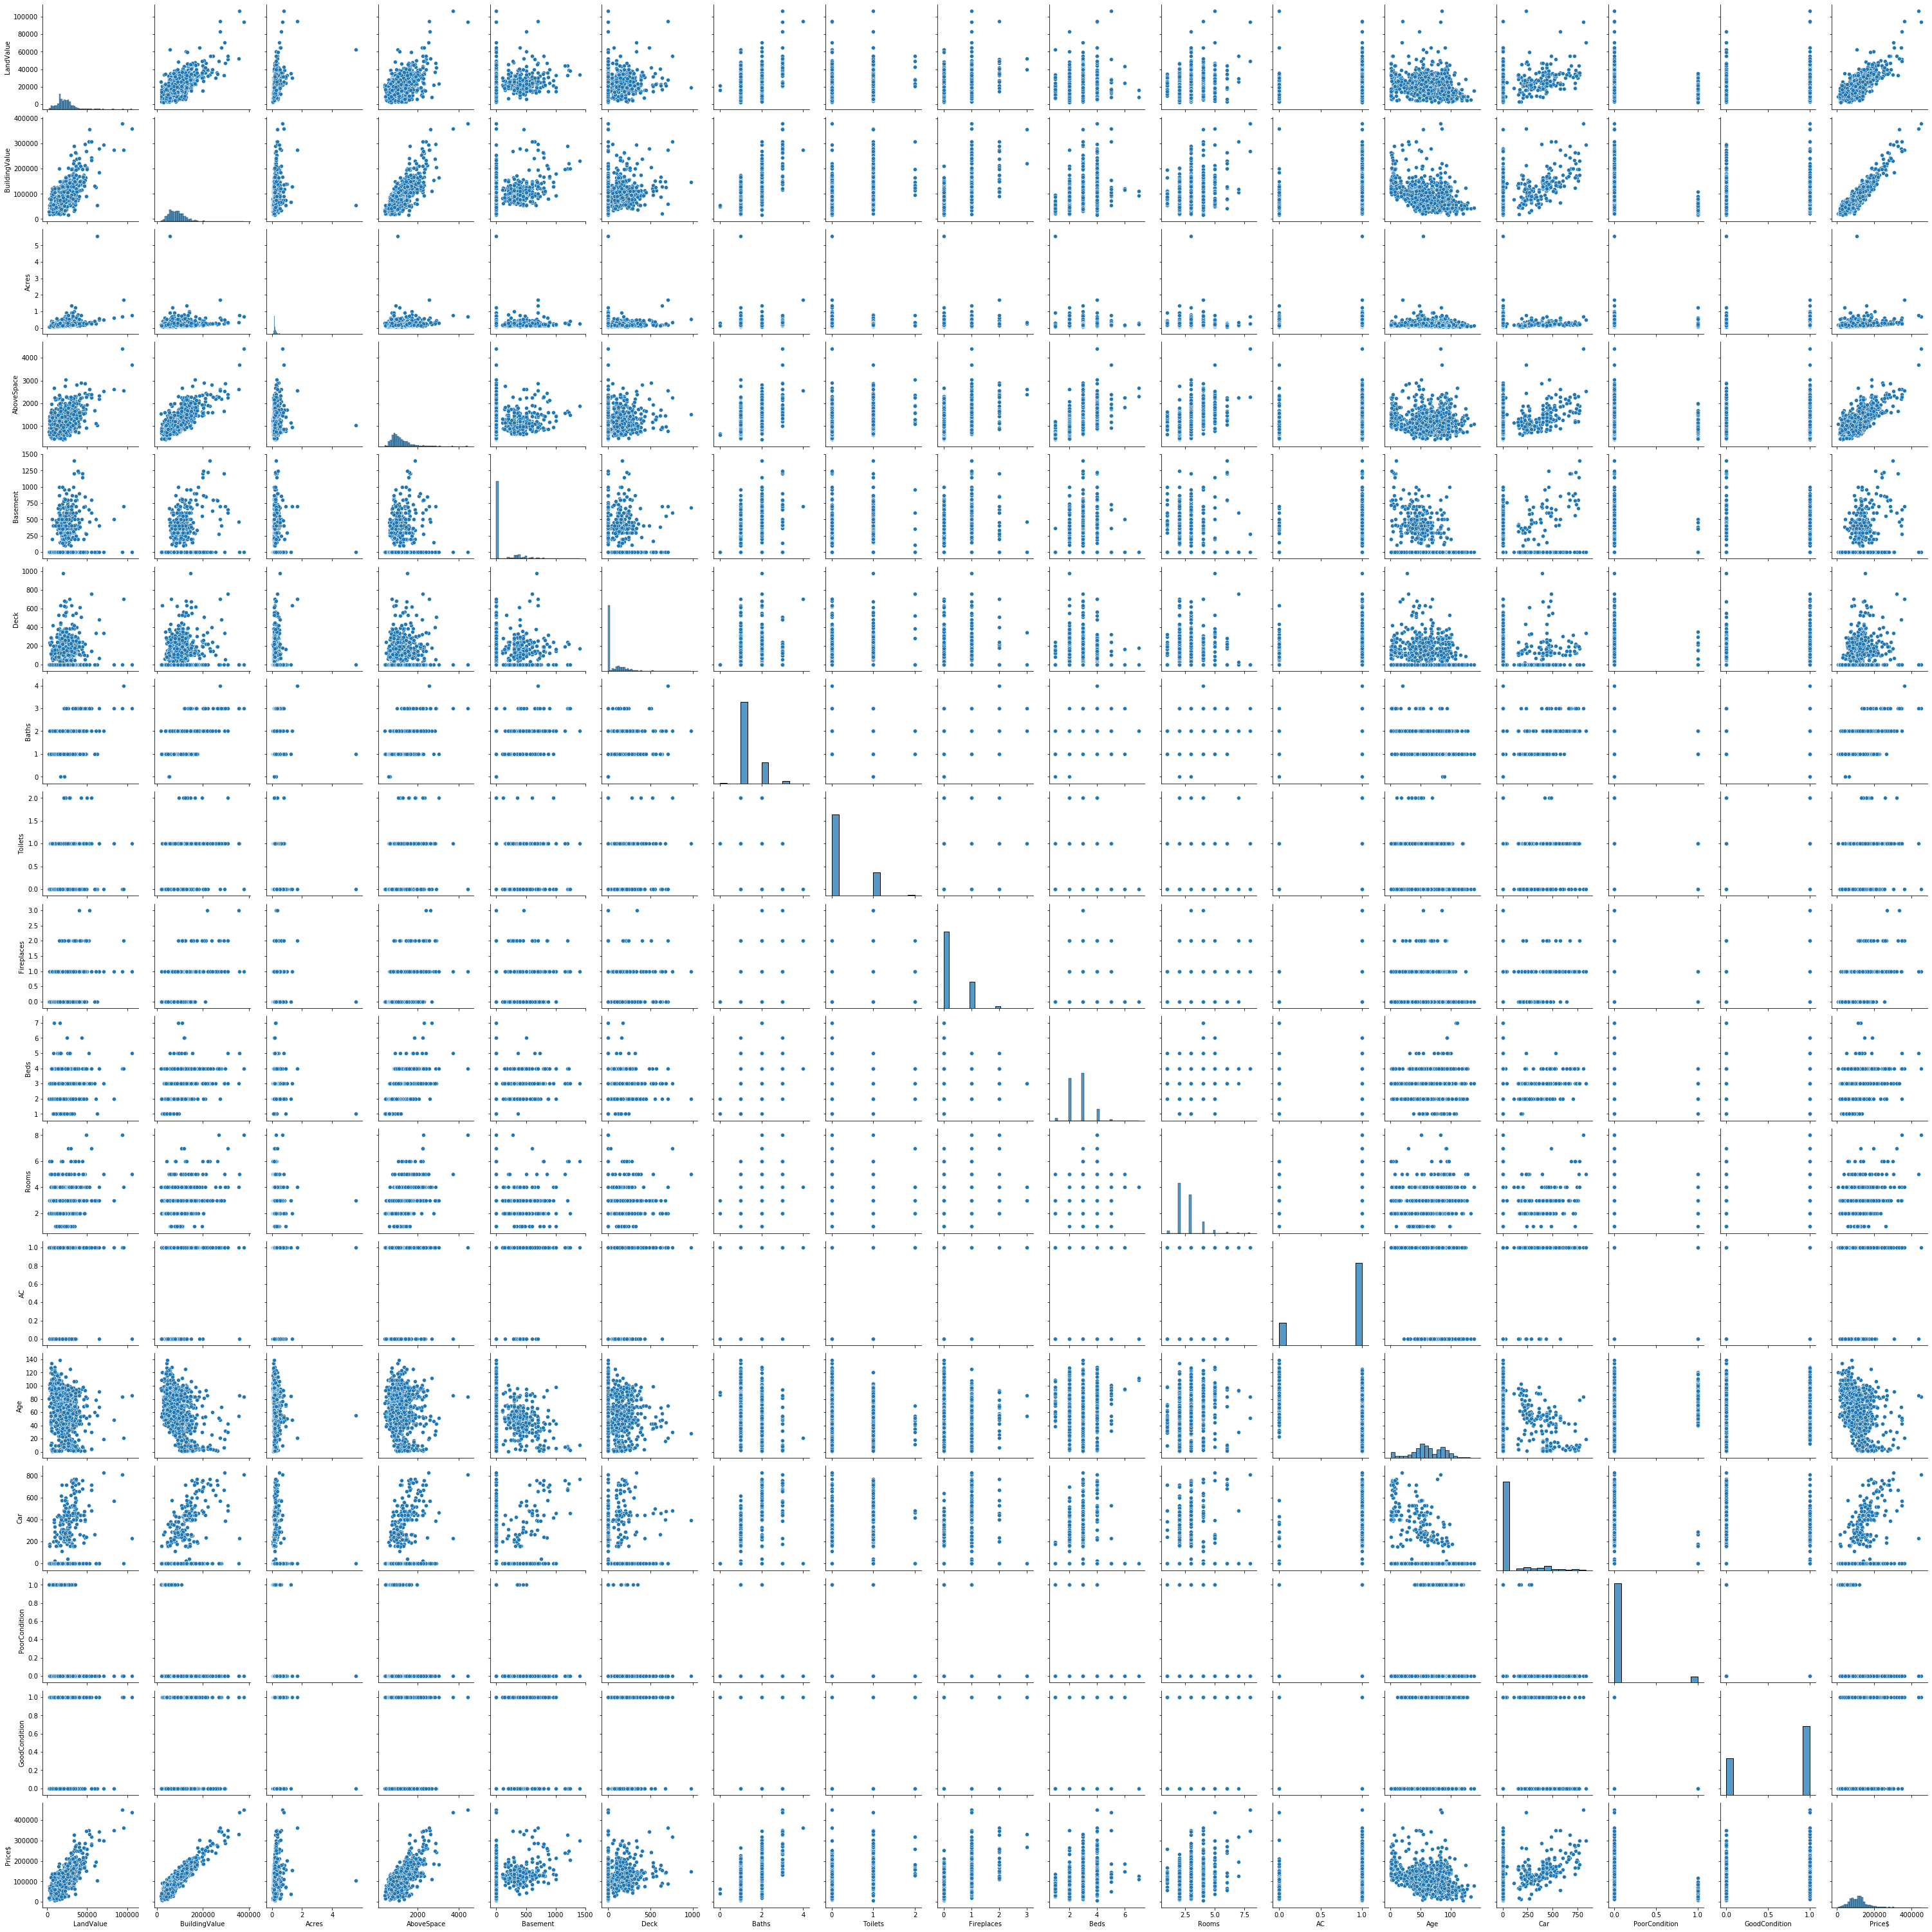

In [30]:
sns.pairplot(pre_train)

In [20]:
pre_train.corr().style.background_gradient().set_precision(2)

,LandValue,BuildingValue,Acres,AboveSpace,Basement,Deck,Baths,Toilets,Fireplaces,Beds,Rooms,AC,Age,Car,PoorCondition,GoodCondition,Price$
LandValue,1.00,0.70,0.39,0.50,0.26,0.18,0.39,0.29,0.42,0.20,0.23,0.29,-0.22,0.37,-0.15,0.09,0.76
BuildingValue,0.70,1.00,0.17,0.76,0.39,0.29,0.64,0.44,0.58,0.46,0.35,0.37,-0.45,0.54,-0.25,0.08,0.93
Acres,0.39,0.17,1.00,0.15,0.10,0.08,0.14,0.05,0.11,0.01,0.06,0.04,-0.09,0.09,-0.02,-0.02,0.19
AboveSpace,0.50,0.76,0.15,1.00,0.12,0.17,0.53,0.38,0.50,0.60,0.56,0.16,-0.06,0.36,-0.08,0.02,0.72
Basement,0.26,0.39,0.10,0.12,1.00,0.16,0.37,0.26,0.26,0.17,0.02,0.21,-0.34,0.25,-0.09,0.05,0.37
Deck,0.18,0.29,0.08,0.17,0.16,1.00,0.21,0.16,0.13,0.13,0.05,0.16,-0.22,0.14,-0.10,0.05,0.27
Baths,0.39,0.64,0.14,0.53,0.37,0.21,1.00,0.14,0.38,0.37,0.23,0.16,-0.36,0.44,-0.07,-0.12,0.57
Toilets,0.29,0.44,0.05,0.38,0.26,0.16,0.14,1.00,0.32,0.28,0.19,0.18,-0.26,0.28,-0.08,0.00,0.42
Fireplaces,0.42,0.58,0.11,0.50,0.26,0.13,0.38,0.32,1.00,0.23,0.28,0.18,-0.14,0.32,-0.08,0.07,0.54
Beds,0.20,0.46,0.01,0.60,0.17,0.13,0.37,0.28,0.23,1.00,0.18,0.11,-0.15,0.16,-0.05,0.02,0.42


In [21]:
X = pre_train.drop(columns=['Price$', 'Partition'])
y = pre_train['Price$']
X_test = pre_test.drop(columns=['Price$', 'Partition'])
y_test = pre_test['Price$']
X_valid = pre_valid.drop(columns=['Price$', 'Partition'])
y_valid = pre_valid['Price$']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

X_valid_scaled = scaler.fit_transform(X_valid)
X_valid = pd.DataFrame(X_valid_scaled)


In [23]:
model = KNeighborsRegressor()
# Create 42 folds
seed = 42
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], 'weights': ['uniform','distance']}]
# Search for best hyperparameters
grid = GridSearchCV(estimator=model, param_grid=hp_candidates, cv=kfold, scoring='r2')
# Search for best hyperparameters
grid = GridSearchCV(estimator=model, param_grid=hp_candidates, cv=kfold, scoring='r2')
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15],
                          'weights': ['uniform', 'distance']}],
             scoring='r2')

In [24]:
# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.7476614163533284
KNeighborsRegressor(n_neighbors=7, weights='distance')
{'n_neighbors': 7, 'weights': 'distance'}


In [26]:
## fIT THE MODEL
knn_model = KNeighborsRegressor(n_neighbors=7)

knn_model.fit(X, y)

KNeighborsRegressor(n_neighbors=7)

In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X)
mse = mean_squared_error(y, train_preds)
rmse = sqrt(mse)
rmse

22491.603464201155

In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt
valid_preds = knn_model.predict(X_valid)
mse = mean_squared_error(y_valid, valid_preds)
rmse = sqrt(mse)
rmse

30885.818666649284

In [29]:
pre_test_preds = knn_model.predict(X_test)


### Machine Learning Approach

In [34]:
# Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [37]:
X_train = pre_train.drop(columns=['Price$', 'Partition'])
y_train = pre_train['Price$']
X_test = pre_test.drop(columns=['Price$', 'Partition'])
y_test = pre_test['Price$']
X_valid = pre_valid.drop(columns=['Price$', 'Partition'])
y_valid = pre_valid['Price$']

In [32]:
# Test options and evaluation metric
num_folds = 10
seed = 42
scoring = 'neg_mean_squared_error'

In [36]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [39]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle = True, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -263178166.756204 (28654628.817844)
LASSO: -263132082.053867 (28653361.227742)
EN: -274716564.202783 (25042582.561152)
KNN: -358754727.373575 (45489490.867637)
CART: -565013019.715969 (66985870.565222)
SVR: -2612485834.291873 (703879523.919331)


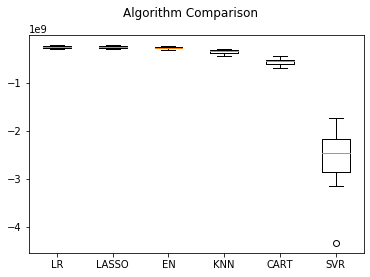

In [40]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [44]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, shuffle = True, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -263178166.756204 (28654628.817844)
ScaledLASSO: -263163559.761453 (28654712.685720)
ScaledEN: -352972387.741776 (77359255.250837)
ScaledKNN: -498578561.590986 (103090805.216579)
ScaledCART: -533789758.522731 (58810555.109400)
ScaledSVR: -2617829595.041629 (704235964.404963)


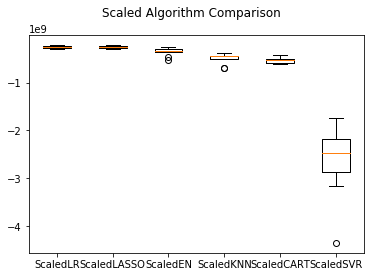

In [45]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


In [49]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, shuffle = True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

In [50]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -500650792.892122 using {'n_neighbors': 7}
-746663079.636190 (138961868.894634) with: {'n_neighbors': 1}
-539872154.464430 (99207948.213543) with: {'n_neighbors': 3}
-504737515.834851 (108375666.126772) with: {'n_neighbors': 5}
-500650792.892122 (125393932.529682) with: {'n_neighbors': 7}
-511666990.282583 (136748153.130136) with: {'n_neighbors': 9}
-518196544.764259 (143701562.516466) with: {'n_neighbors': 11}
-523494997.088576 (153450786.395835) with: {'n_neighbors': 13}
-533252626.624494 (166953384.829816) with: {'n_neighbors': 15}
-550258511.507884 (182459871.469835) with: {'n_neighbors': 17}
-556451692.545666 (190229877.826721) with: {'n_neighbors': 19}
-565973791.276901 (197703984.577446) with: {'n_neighbors': 21}


In [51]:
##Ensemble Methods
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, shuffle = True, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -324623141.064206 (36019055.256035)
ScaledGBM: -277944153.798760 (31893711.011667)
ScaledRF: -291542299.048590 (33370595.680588)
ScaledET: -280805636.806567 (41121858.098669)


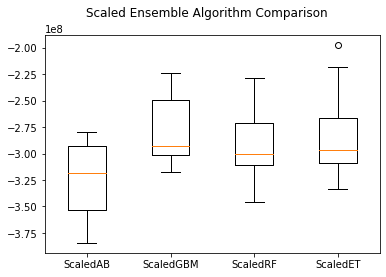

In [52]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [58]:
#Tuning
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model,  param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)


In [59]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: -266692696.014989 using {'n_estimators': 50}
-266692696.014989 (40423917.016938) with: {'n_estimators': 50}
-269232311.759685 (44329305.204359) with: {'n_estimators': 100}
-271554084.426938 (46458390.847518) with: {'n_estimators': 150}
-277218492.235747 (47341212.916101) with: {'n_estimators': 200}
-281638704.167232 (47705760.458334) with: {'n_estimators': 250}
-284881028.081994 (49159525.779555) with: {'n_estimators': 300}
-289832342.957766 (50047562.692890) with: {'n_estimators': 350}
-293270202.485807 (51656821.041925) with: {'n_estimators': 400}


In [60]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=50)
model.fit(rescaledX, y_train)


GradientBoostingRegressor(n_estimators=50, random_state=42)

In [61]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_valid)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(y_valid, predictions))

406565145.41372555


In [208]:
##dividing dataset into training, validation and testing set
# splitting the dataframe into 2 parts
# on basis of 'Weight' column values
post_train = post[post['Partition'] == 't']
post_valid = post[post['Partition'] == 'v']
post_test = post[post['Partition'] == 's']
# printing df1
post_train.head()

,LandValue,BuildingValue,Acres,AboveSpace,Basement,Deck,Baths,Toilets,Fireplaces,Beds,Rooms,AC,Age,Car,PoorCondition,GoodCondition,Price$,Partition
0,18200,81300,0.170,892,0,364,1,1,1,2,3,1,68.893151,0,1,0,54174.535612,t
1,15700,67000,0.146,692,0,0,1,0,0,2,2,1,53.824658,0,0,0,92589.206318,t
2,18400,91500,0.532,1068,350,0,2,0,0,3,2,1,52.846575,0,0,1,122040.453860,t
3,16600,88500,0.152,1278,0,160,1,0,0,4,2,1,92.942466,0,0,1,112289.037450,t
4,18100,75100,0.258,939,200,192,1,0,1,3,2,1,52.854795,0,0,1,95544.180988,t


In [209]:
post_train.tail()

,LandValue,BuildingValue,Acres,AboveSpace,Basement,Deck,Baths,Toilets,Fireplaces,Beds,Rooms,AC,Age,Car,PoorCondition,GoodCondition,Price$,Partition
989,3600,37100,0.110,848,0,0,1,0,0,2,2,0,88.224658,0,0,1,53900.000000,t
990,29400,96500,0.189,996,240,0,1,0,0,3,3,1,68.928767,0,0,1,137898.817921,t
991,34900,148000,0.340,1243,0,224,2,1,0,3,3,1,7.498630,671,0,0,189010.014927,t
992,16000,27700,0.145,864,0,0,1,0,0,3,2,0,69.328767,0,1,0,28727.812236,t
993,21300,82000,0.172,912,0,252,1,0,0,2,3,1,48.802740,0,0,1,88649.240092,t


In [210]:
post_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 993
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LandValue      994 non-null    int64  
 1   BuildingValue  994 non-null    int64  
 2   Acres          994 non-null    float64
 3   AboveSpace     994 non-null    int64  
 4   Basement       994 non-null    int64  
 5   Deck           994 non-null    int64  
 6   Baths          994 non-null    int64  
 7   Toilets        994 non-null    int64  
 8   Fireplaces     994 non-null    int64  
 9   Beds           994 non-null    int64  
 10  Rooms          994 non-null    int64  
 11  AC             994 non-null    int64  
 12  Age            994 non-null    float64
 13  Car            994 non-null    int64  
 14  PoorCondition  994 non-null    int64  
 15  GoodCondition  994 non-null    int64  
 16  Price$         994 non-null    float64
 17  Partition      994 non-null    object 
dtypes: float64

In [211]:
post_train.isnull().sum()

LandValue        0
BuildingValue    0
Acres            0
AboveSpace       0
Basement         0
Deck             0
Baths            0
Toilets          0
Fireplaces       0
Beds             0
Rooms            0
AC               0
Age              0
Car              0
PoorCondition    0
GoodCondition    0
Price$           0
Partition        0
dtype: int64

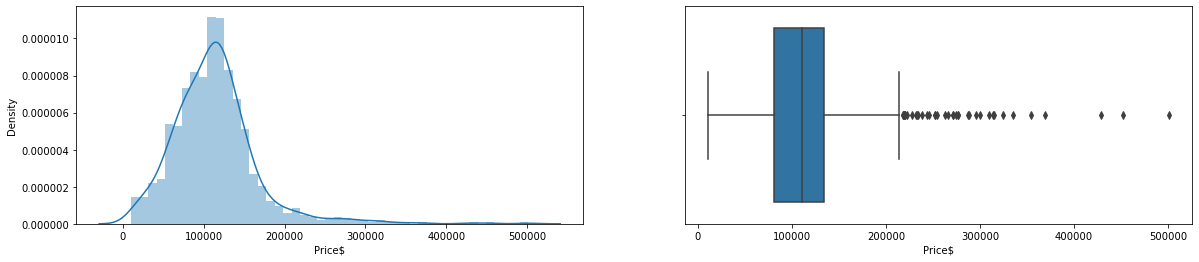

In [212]:
#Univariate analysis price

f1 = plt.figure(figsize=(20,4))

f1.add_subplot(1,2,1)
sns.distplot(post_train['Price$'])

f1.add_subplot(1,2,2)
sns.boxplot(post_train['Price$'])

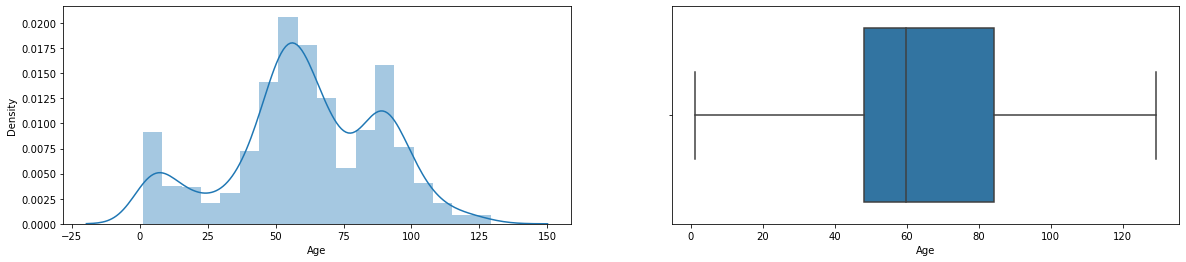

In [213]:
#Univariate analysis price

f3 = plt.figure(figsize=(20,4))

f3.add_subplot(1,2,1)
sns.distplot(post_train['Age'])

f3.add_subplot(1,2,2)
sns.boxplot(post_train['Age'])

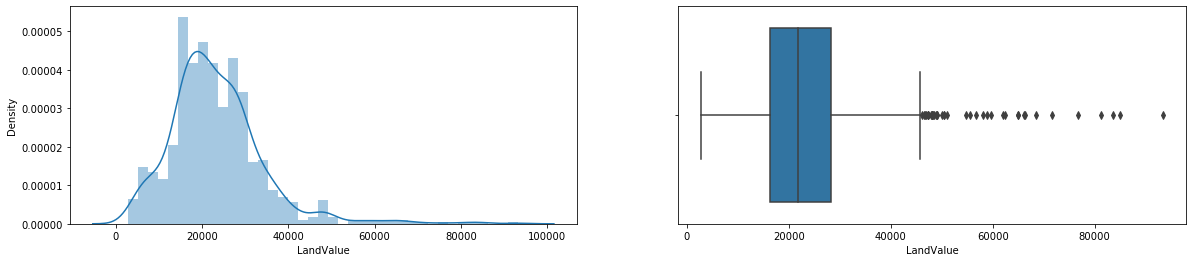

In [214]:
#Univariate analysis Land Value.

f5 = plt.figure(figsize=(20,4))

f5.add_subplot(1,2,1)
sns.distplot(post_train['LandValue'])

f5.add_subplot(1,2,2)
sns.boxplot(post_train['LandValue'])

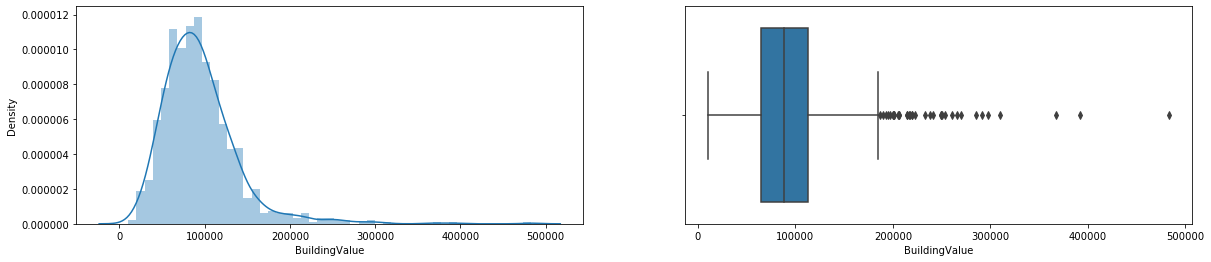

In [215]:
#Univariate analysis Building Value.

f6 = plt.figure(figsize=(20,4))

f6.add_subplot(1,2,1)
sns.distplot(post_train['BuildingValue'])

f6.add_subplot(1,2,2)
sns.boxplot(post_train['BuildingValue'])

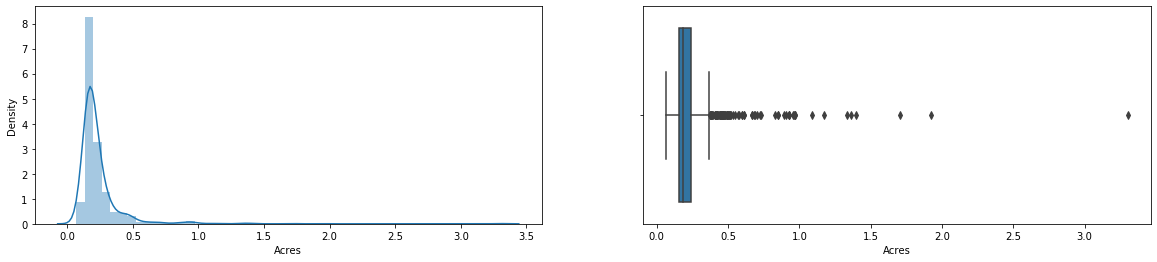

In [216]:
#Univariate analysis Acres.

f6 = plt.figure(figsize=(20,4))

f6.add_subplot(1,2,1)
sns.distplot(post_train['Acres'])

f6.add_subplot(1,2,2)
sns.boxplot(post_train['Acres'])

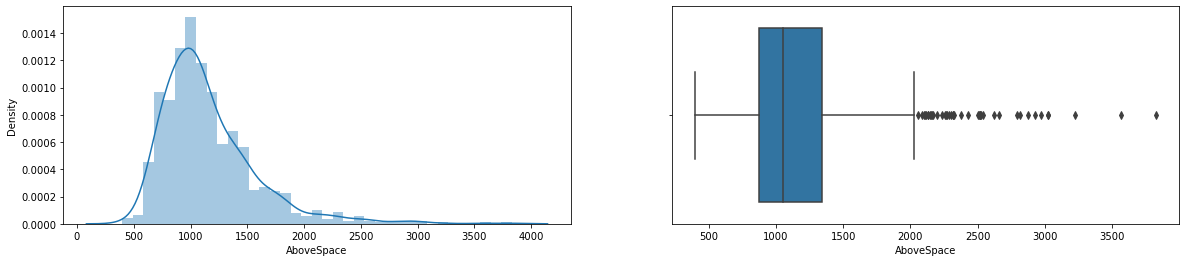

In [217]:
#Univariate analysis AbOVE SPACE Value.

f6 = plt.figure(figsize=(20,4))

f6.add_subplot(1,2,1)
sns.distplot(post_train['AboveSpace'])

f6.add_subplot(1,2,2)
sns.boxplot(post_train['AboveSpace'])

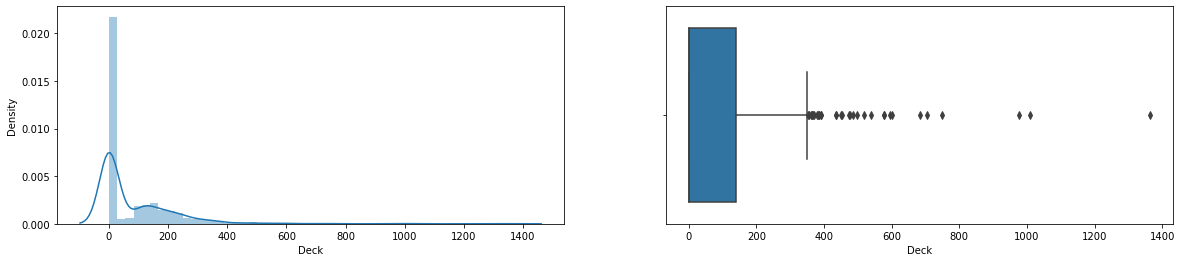

In [218]:
#Univariate analysis deck.

f6 = plt.figure(figsize=(20,4))

f6.add_subplot(1,2,1)
sns.distplot(post_train['Deck'])

f6.add_subplot(1,2,2)
sns.boxplot(post_train['Deck'])

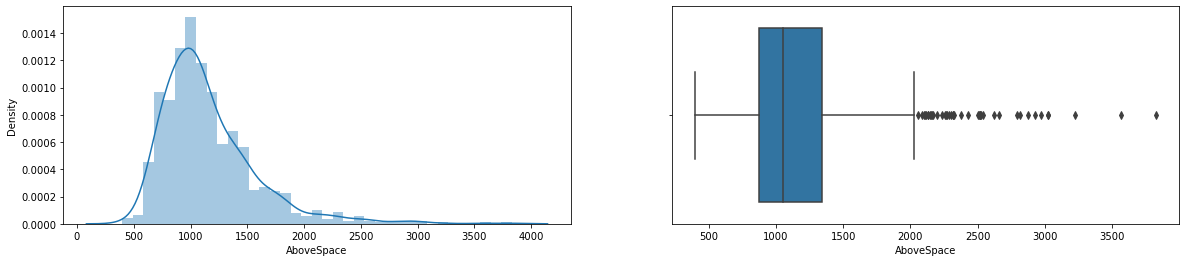

In [219]:
#Univariate analysis AbOVE SPACE Value.

f6 = plt.figure(figsize=(20,4))

f6.add_subplot(1,2,1)
sns.distplot(post_train['AboveSpace'])

f6.add_subplot(1,2,2)
sns.boxplot(post_train['AboveSpace'])

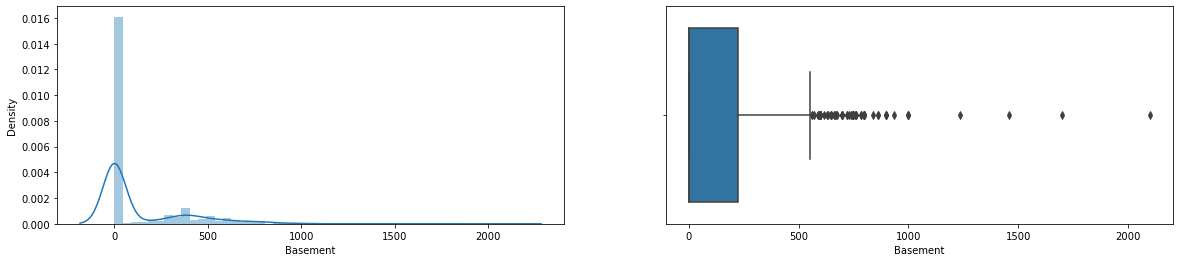

In [220]:
#Univariate analysis AbOVE SPACE Value.

f6 = plt.figure(figsize=(20,4))

f6.add_subplot(1,2,1)
sns.distplot(post_train['Basement'])

f6.add_subplot(1,2,2)
sns.boxplot(post_train['Basement'])

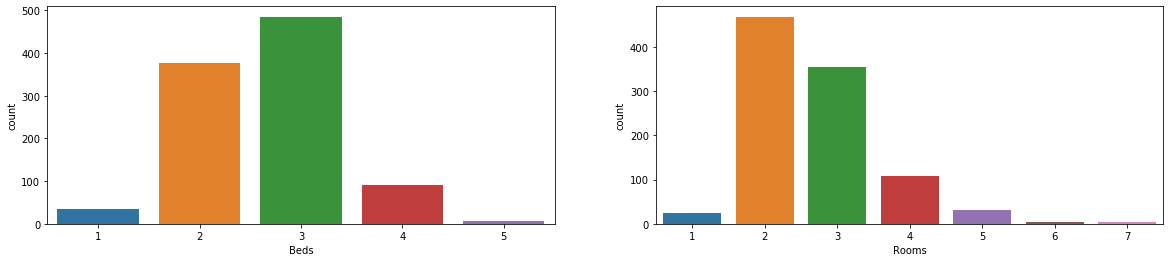

In [221]:
#Univariate analysis Beds and Rooms.

f5 = plt.figure(figsize=(20,4))

f5.add_subplot(1,2,1)
sns.countplot(post_train['Beds'])

f5.add_subplot(1,2,2)
sns.countplot(post_train['Rooms'])

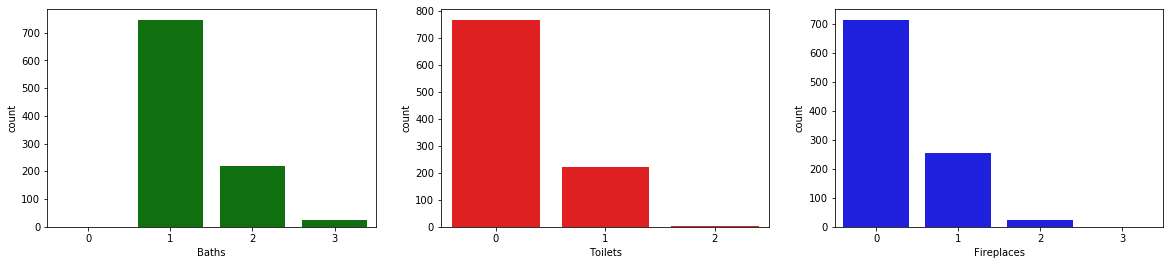

In [222]:
f = plt.figure(figsize=(20,4))

f.add_subplot(1,3,1)
sns.countplot(post_train['Baths'], color='green')

f.add_subplot(1,3,2)
sns.countplot(post_train['Toilets'], color='red')

f.add_subplot(1,3,3)
sns.countplot(post_train['Fireplaces'], color='blue')

In [223]:
#define x and y
X_post_train = post_train.drop(columns=['Price$', 'Partition', 'PoorCondition', 'GoodCondition', 'AC'])
y_post_train = post_train['Price$']
X_post_test = post_test.drop(columns=['Price$', 'Partition', 'PoorCondition', 'GoodCondition', 'AC'])
y_post_test = post_test['Price$']
X_post_valid = post_valid.drop(columns=['Price$', 'Partition', 'PoorCondition', 'GoodCondition', 'AC'])
y_post_valid = post_valid['Price$']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_post_train_scaled = scaler.fit_transform(X_post_train)
X_post_train = pd.DataFrame(X_post_train_scaled)

X_post_test_scaled = scaler.fit_transform(X_post_test)
X_post_test  = pd.DataFrame(X_post_test_scaled)

X_post_valid_scaled = scaler.fit_transform(X_post_valid)
X_post_valid = pd.DataFrame(X_post_valid_scaled)


In [224]:
# Create 42 folds
seed = 42
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15], 'weights': ['uniform','distance']}]
# Search for best hyperparameters
grid = GridSearchCV(estimator=model, param_grid=hp_candidates, cv=kfold, scoring='r2')
# Search for best hyperparameters
grid = GridSearchCV(estimator=model, param_grid=hp_candidates, cv=kfold, scoring='r2')
grid.fit(X_post_train, y_post_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15],
                          'weights': ['uniform', 'distance']}],
             scoring='r2')

In [225]:
# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.7175986147639439
KNeighborsRegressor(n_neighbors=7, weights='distance')
{'n_neighbors': 7, 'weights': 'distance'}


In [226]:
## fIT THE MODEL
knn_model = KNeighborsRegressor(n_neighbors=7)

knn_model.fit(X_post_train, y_post_train)

KNeighborsRegressor(n_neighbors=7)

In [227]:
from sklearn.metrics import mean_squared_error
from math import sqrt
post_train_preds = knn_model.predict(X_post_train)
mse = mean_squared_error(y_post_train, post_train_preds)
rmse = sqrt(mse)
rmse

23741.756154786493

In [228]:
###on validation set
post_valid_preds = knn_model.predict(X_post_valid)
mse = mean_squared_error(y_post_valid, post_valid_preds)
rmse = sqrt(mse)
rmse

33901.52460681606

In [229]:
post_test_preds = knn_model.predict(X_post_test)

In [230]:
results = pd.DataFrame()
results["Pre-test-results"] = pre_test_preds 
results["post-test-results"] = post_test_preds

In [231]:
results.head()

,Pre-test-results,post-test-results
0,109011.782633,115793.238175
1,108290.277176,95867.000484
2,78825.114513,89742.773178
3,89604.633198,76742.661907
4,94393.783626,68207.942754


In [232]:
results["percentage_change"] = ((results["post-test-results"]-results["Pre-test-results"])/results["Pre-test-results"])*100

results["percentage_change"].head()

0     6.220846
1   -11.472200
2    13.850482
3   -14.354136
4   -27.741065
Name: percentage_change, dtype: float64

In [233]:
##Average change
results["percentage_change"].mean()

-5.631560839715656

In [234]:
results.to_csv('results.csv')